## In this project, I will analyze some of the data used by Hans Rosling in his famous data visualizations - (***GDP, school completion rate, employment, and life expectancy***). 

Some questions I can ask are:

1) Does Life Expectancy depend on *GDP*?  
    1b) How has this changed with *time*?  
2) How does female school completion rate differ from male completion rate for  
    ..a) different countries  
    ..b) countries with low LE and  GDP   
    ..c) countries with high LE and GDP  
    ..d) over time   
3) Does employment depend on school completion rate for females vs males?  
4) How does employment affect GDP?  
5) How does employment vary with LE?  
6) Has male completion rate increased faster than female completion rate over the last 40 years?   
7) Are there any consistent trends across countries? - Any global recessions

** Some of the data analysis done here is adapted from the Udacity Intro to Data Analysis Course **

## ** First, I import the data: **

In [50]:
import pandas as pd
employment_above_15 = pd.read_csv('employment_above_15.csv', index_col = 'Country')
female_completion_rate = pd.read_csv('female_completion_rate.csv', index_col = 'Country')
male_completion_rate = pd.read_csv('male_completion_rate.csv', index_col = 'Country')
life_expectancy = pd.read_csv('life_expectancy.csv', index_col = 'Country')
gdp_per_capita = pd.read_csv('gdp_per_capita.csv', index_col = 'Country')

life_expectancy['1800'].loc["Anguilla"] #column, then row call

print("We need to be careful here because each file has a different set of countries, they also differ in time range:")
print("No in employment: %s") %len(employment_above_15)
print("No in female completion rate: %s") %len(female_completion_rate)
print("No in male completion rate: %s") %len(male_completion_rate)
print("No in life expectancy: %s") %len(life_expectancy)
print("No in gdp: %s") %len(gdp_per_capita)


We need to be careful here because each file has a different set of countries, they also differ in time range:
No in employment: 178
No in female completion rate: 275
No in male completion rate: 275
No in life expectancy: 244
No in gdp: 275


## If the data is not available, the numbers in the table are set to 'NaNs' so I remove the NaNs

In [40]:
# s1.add(s2,fill_value=0) add 2 series, replacing nan with 0

### Udacity Course - Numpy Arrays ###

In [64]:
import numpy as np
print("Maximum Percentage Employment Value: %s in Country: %s at Year: %s") % (employment_above_15.values.max(), np.argmax(np.max(employment_above_15, axis=1)), np.argmax(np.max(employment_above_15, axis=0)))
print("Minimum Percentage Employment Value: %s in Country: %s at Year: %s") % (employment_above_15.values.min(), np.argmin(np.min(employment_above_15, axis=1)), np.argmin(np.min(employment_above_15, axis=0)))
#employment_above_15.describe()


Maximum Percentage Employment Value: 87.6999969482 in Country: Rwanda at Year: 1994
Minimum Percentage Employment Value: 26.6000003815 in Country: West Bank and Gaza at Year: 2002


#### Functions that calculate overall completion rate and return a standardized array ####

In [42]:
def overall_completion_rate(female_completion, male_completion):
    full_completion = 0.5*female_completion + 0.5*male_completion
    return full_completion

def standardize_data(values):
    return ((values - values.mean())/values.std())

#### When a country has life expectancy above the mean, is gdp above the mean also?  ####

In [43]:
def variable_correlation(variable1, variable2):  
    num_same_direction = (((variable1 > variable1.mean()) & (variable2 > variable2.mean())).sum()) + (((variable1 < variable1.mean()) & (variable2 < variable2.mean())).sum())
    num_different_direction = (((variable1 > variable1.mean()) & (variable2 <= variable2.mean())).sum()) + (((variable1 < variable1.mean()) & (variable2 >= variable2.mean())).sum())
    return (num_same_direction, num_different_direction)



#### Function to reverse names, using reversed, split, join ####

In [44]:
names=pd.Series(['Andre Agassi', 'Barry Bonds', 'Christopher Columbus', 'Daniel Defoe'],
                index=[0, 1, 2, 3])
def reverse_names(names):
    def namerev(name):
        RevNm = ', '.join(reversed(name.split()))
        return RevNm    
    newname = names.apply(namerev)
    return newname

print(reverse_names(names))

0            Agassi, Andre
1             Bonds, Barry
2    Columbus, Christopher
3            Defoe, Daniel
dtype: object


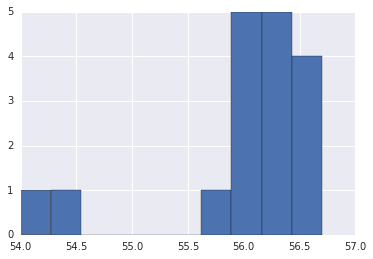

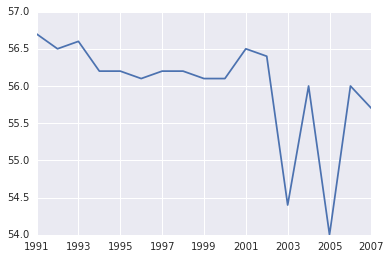

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
employment_above_15.loc['Afghanistan'].hist()
plt.show()
employment_above_15.loc['Afghanistan'].plot()


In [65]:
# Pandas, need to be careful with doing operations on rows - need to keep specifying axes!